mismatches: 27 / 258
16: ref=before  pred=cousin
23: ref=birthday  pred=white
33: ref=bowling  pred=dog
34: ref=bowling  pred=dog
43: ref=candy  pred=kiss
58: ref=color  pred=secretary
83: ref=deaf  pred=corn
99: ref=eat  pred=who
104: ref=fine  pred=what
106: ref=fine  pred=cool

Top confusion pairs:
ref      pred     
bowling  dog          2
before   cousin       1
candy    kiss         1
color    secretary    1
deaf     corn         1
eat      who          1
fine     cool         1
         what         1
finish   mother       1
go       corn         1
dtype: int64


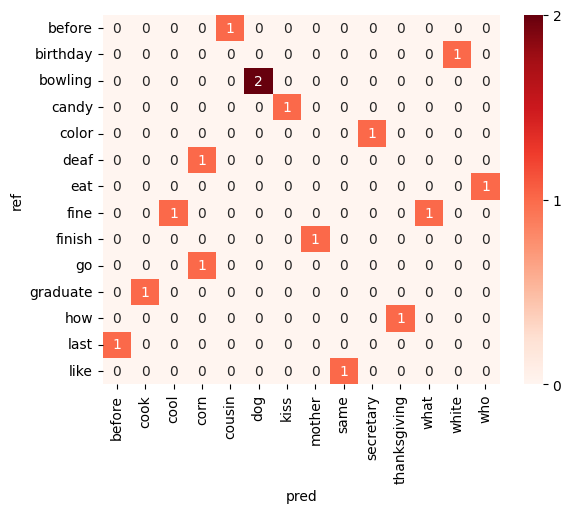

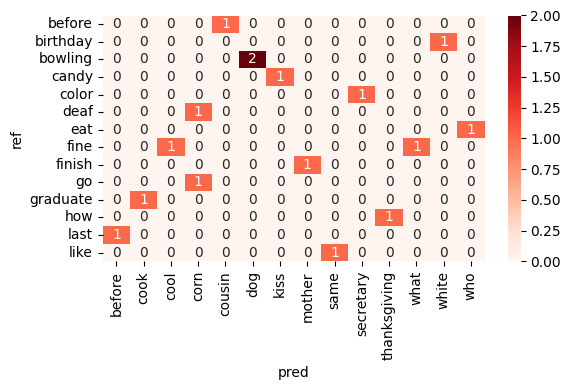

In [10]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

ref_path  = Path("out/test/test_tmp_refs.txt")
pred_path = Path("out/test/test_tmp_pres.txt")

refs  = [l.strip() for l in ref_path.read_text().splitlines()]
preds = [l.strip() for l in pred_path.read_text().splitlines()]
assert len(refs) == len(preds)

# rows where pred != ref
miss_idx = [i for i,(r,p) in enumerate(zip(refs, preds)) if r != p]
print(f"mismatches: {len(miss_idx)} / {len(refs)}")
for i in miss_idx[:10]:  # show first few
    print(f"{i}: ref={refs[i]}  pred={preds[i]}")

# top confusion pairs
df_miss = pd.DataFrame({"ref": [refs[i] for i in miss_idx],
                        "pred": [preds[i] for i in miss_idx]})
pair_counts = df_miss.value_counts().sort_values(ascending=False)
print("\nTop confusion pairs:")
print(pair_counts.head(10))

# heatmap over the most frequent mistake pairs (ref/pred)
top_pairs = pair_counts.head(15).index.tolist()
top_refs  = sorted(set(r for r, _ in top_pairs))
top_preds = sorted(set(p for _, p in top_pairs))
cm = pd.crosstab(df_miss["ref"], df_miss["pred"])
cm = cm.loc[top_refs, top_preds]
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
                 cbar_kws={"ticks": None})  # keep default, we’ll override

cbar = ax.collections[0].colorbar
vmin, vmax = int(np.nanmin(cm.values)), int(np.nanmax(cm.values))
cbar.set_ticks(range(vmin, vmax+1, 1))  # step = 1

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.tight_layout()
plt.show()